In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal # Podstawowe funckcje przetwarzania sygnałów
import scipy.ndimage as nd # Podstawowe funkcje przetwarzania obrazów
from skimage import io
from skimage import color
%matplotlib inline

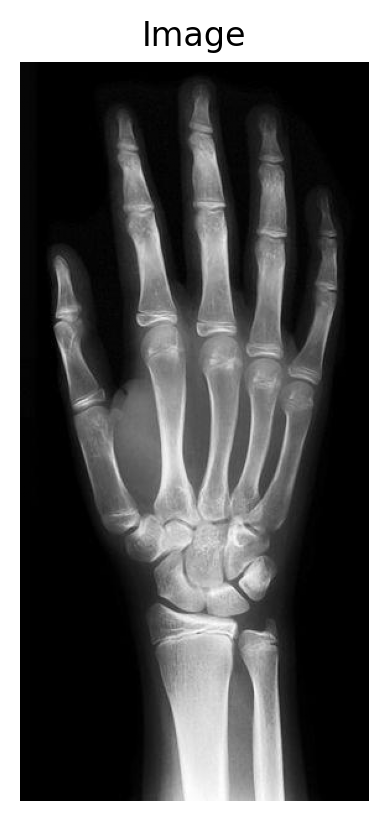

In [22]:
image = io.imread("xray.jpg")
image = color.rgb2gray(image) # Konwersja do przestrzeni szarości
image = (image - np.min(image)) / (np.max(image) - np.min(image)) # Normalizacja do zakresu [0-1]
plt.figure(dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.show()

In [23]:
def our_gradient(image, mode):
    gradient_x, gradient_y = np.zeros_like(image), np.zeros_like(image)
    nrows, ncols = image.shape
    step = 1
    for x in range(nrows-1):
      for y in range(ncols-1):
        if mode=="forward":
              gradient_x[x, y] = image[x + step, y] - image[x, y]
              gradient_y[x, y] = image[x, y + step] - image[x, y]

        elif mode=="central":
              gradient_x[x, y] = (image[x + step, y] - image[x-step, y]) / 2
              gradient_y[x, y] = (image[x, y + step] - image[x, y - step]) / 2

        elif "backward":
              gradient_x[x, y] = image[x, y] - image[x - step, y]
              gradient_y[x, y] = image[x, y] - image[x, y - step]


    ''' BEZ PETLI
    #FORWARD
    gradient_y[0:nrows-1, 0:ncols-1] = image[1:nrows, 0:ncols-1] - image[0:nrows-1, 0:ncols-1]
    gradient_y[0:-1, :] = image[1:, :] - image[0:-1, :]
    gradient_y[-1: :] = image[-1, :] - image[-2, :]

    gradient_x[0:-1, 0:-1] = image[0:-1, 1:] - image[0:-1, 0:-1]
    gradient_x[:, -1] = image[:, -1] - image[:, -2]
    '''

    return gradient_y, gradient_x

In [24]:
np.random.seed(123)
rand_image = np.random.randn(5, 5)
y_numpy, x_numpy = np.gradient(rand_image)
y_forward, x_forward = our_gradient(rand_image, "forward")
y_central, x_central = our_gradient(rand_image, "central")
y_backward, x_backward = our_gradient(rand_image, "backward")
print("Y_numpy, X_numpy: ")
print(y_numpy)
print(x_numpy)
print("Y_forward, X_forward: ")
print(y_forward)
print(x_forward)
print("Y_central, X_central: ")
print(y_central)
print(x_central)
print("Y_backward, X_backward: ")
print(y_backward)
print(x_backward)

Y_numpy, X_numpy: 
[[ 2.73706714 -3.42402469 -0.71189113  2.77223097 -0.28814015]
 [ 0.20337223 -0.54602721  0.60420556  0.43369636  0.06730915]
 [-1.04289391  2.31630466  1.30784936 -0.13094118  0.6264634 ]
 [ 0.70812736  0.7927205  -1.21361175  0.90736552 -0.40494935]
 [ 1.17171985 -0.71519805 -3.12261996  0.17177515 -1.64006707]]
[[ 2.08297605  0.68430455 -1.25182008 -0.43078938  0.92769446]
 [-4.07811578 -1.04017458  1.84630775 -0.21891389 -2.13267666]
 [ 0.58417718  1.08513789 -0.27209651 -0.96768579  0.19492004]
 [ 2.64028136  1.31056868 -0.60093809 -0.90029984 -0.6178675 ]
 [ 0.75336345 -0.83660122 -0.15745149 -0.1590234  -2.42970971]]
Y_forward, X_forward: 
[[ 2.08297605 -0.71436695 -1.78927321  0.92769446  0.        ]
 [-4.07811578  1.99776661  1.69484889 -2.13267666  0.        ]
 [ 0.58417718  1.5860986  -2.13029162  0.19492004  0.        ]
 [ 2.64028136 -0.01914399 -1.18273219 -0.6178675   0.        ]
 [ 0.          0.          0.          0.          0.        ]]
[[ 2.73706

In [25]:
""""
1-D
X = [...]
W = [-1, 0, 1]
2-D
Wx =
[
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0]
]
Wy =
[
    [0, -1, 0],
    [0, 0, 0],
    [0, 1, 0]
]
"""

from scipy.signal import convolve2d

def sobel_gradient(image):
    Gx = np.zeros(image.shape[0])
    Gy = np.zeros(image.shape[1])
    Wx = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
    ]
    Wy = [
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
    ]

    Gx = convolve2d(image, Wx)
    Gy = convolve2d(image, Wy)

    return Gx, Gy

def prewitt_gradient(image):
    Gx = np.zeros(image.shape[0])
    Gy = np.zeros(image.shape[1])
    Wx = [
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
    ]
    Wy = [
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
    ]

    Gx = convolve2d(image, Wx)
    Gy = convolve2d(image, Wy)

    return Gx, Gy

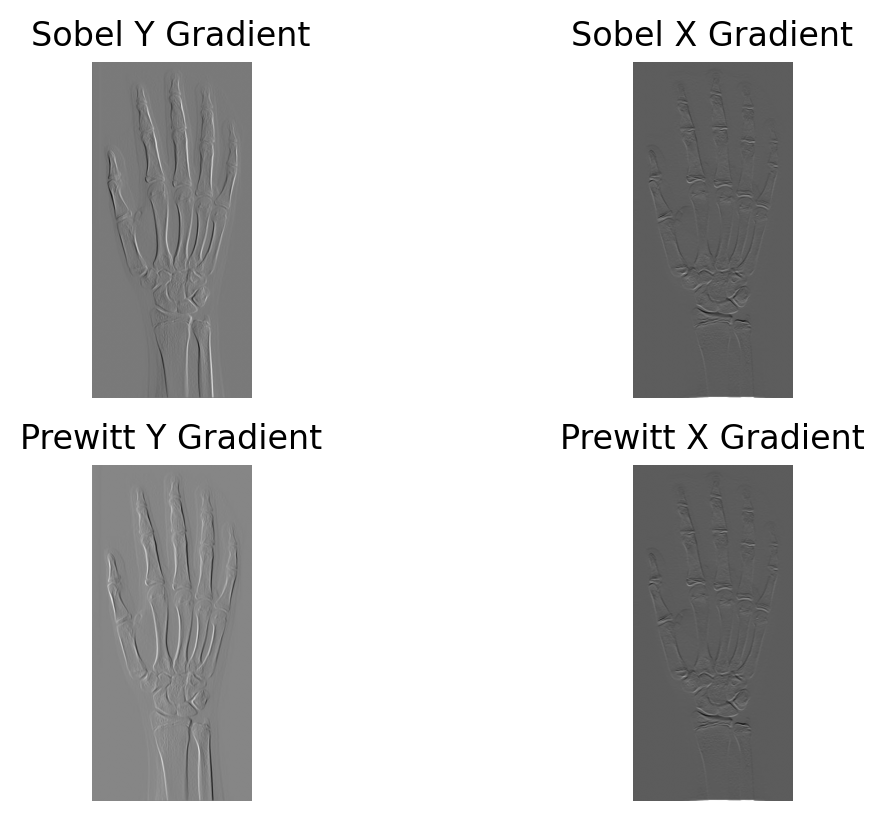

In [26]:
sobel_y_gradient, sobel_x_gradient = sobel_gradient(image)
prewitt_y_gradient, prewitt_x_gradient = prewitt_gradient(image)

y_gradient, x_gradient = np.gradient(image)
plt.figure(dpi=200)
plt.subplot(2, 2, 1)
plt.imshow(sobel_y_gradient, cmap='gray')
plt.axis('off')
plt.title("Sobel Y Gradient")
plt.subplot(2, 2, 2)
plt.imshow(sobel_x_gradient, cmap='gray')
plt.axis('off')
plt.title("Sobel X Gradient")
plt.subplot(2, 2, 3)
plt.imshow(prewitt_y_gradient, cmap='gray')
plt.axis('off')
plt.title("Prewitt Y Gradient")
plt.subplot(2, 2, 4)
plt.imshow(prewitt_x_gradient, cmap='gray')
plt.axis('off')
plt.title("Prewitt X Gradient")
plt.show()

In [27]:
def gradient_magnitude(x_gradient, y_gradient):
    return np.sqrt(x_gradient**2 + y_gradient**2)

def gradient_angle(x_gradient, y_gradient):
    return np.arctan2(y_gradient, x_gradient)

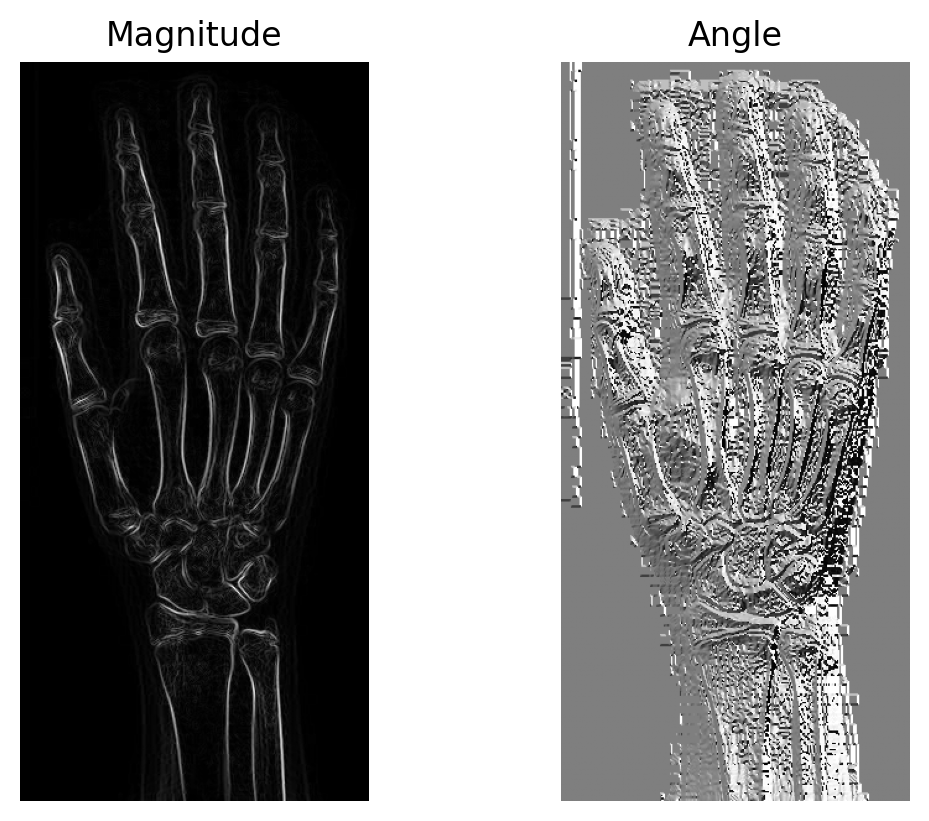

In [28]:
mag, angle = gradient_magnitude(x_gradient, y_gradient), gradient_angle(x_gradient, y_gradient)
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(mag, cmap='gray')
plt.axis('off')
plt.title("Magnitude")
plt.subplot(1, 2, 2)
plt.imshow(angle, cmap='gray')
plt.axis('off')
plt.title("Angle")
plt.show()

In [29]:
def uniform_filter(image, filter_size=(3, 3)):
  filter = np.ones(filter_size) / (filter_size[0]*filter_size[1])
  return convolve2d(image, filter)

def gaussian_filter(image, sigma): #sigma-odchylenie standardowe
  size = 3*sigma
  m = size//2
  k, l = np.mgrid[-m:m+1, -m:m+1]
  gauss = np.exp(-(k**2 + l**2)/(2*sigma**2))
  filter = gauss/gauss.sum() #normalizacja
  return convolve2d(image, filter)

def median_filter(image, filter_size=(3, 3)):
    filtered_image = np.zeros_like(image)
    nrows, ncols = image.shape
    for x in range(nrows-1):
      for y in range(ncols-1):
        region = image[x:x+filter_size[0], y:y+filter_size[1]] #wokół aktualnych indeksów x i y
        filtered_image[x, y] = np.median(region)
    return filtered_image

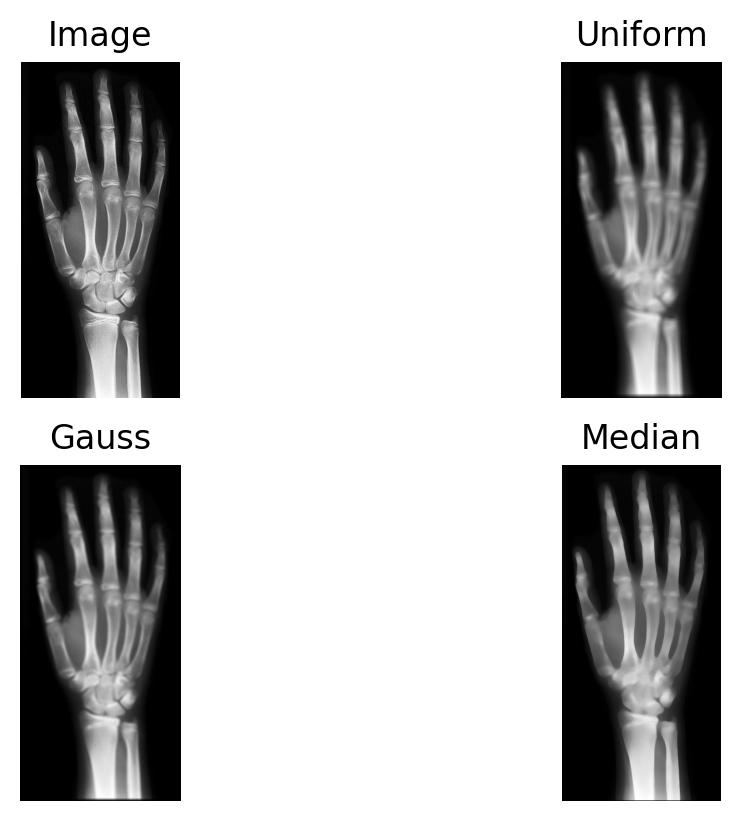

In [30]:
uni_image = uniform_filter(image, (9, 9))
gauss_image = gaussian_filter(image, 2)
median_image = median_filter(image, (9, 9))
plt.figure(dpi=200)
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(2, 2, 2)
plt.imshow(uni_image, cmap='gray')
plt.axis('off')
plt.title("Uniform")
plt.subplot(2, 2, 3)
plt.imshow(gauss_image, cmap='gray')
plt.axis('off')
plt.title("Gauss")
plt.subplot(2, 2, 4)
plt.imshow(median_image, cmap='gray')
plt.axis('off')
plt.title("Median")
plt.show()

In [31]:
def laplacian(image):
  x, y = image.shape
  M= np.array([[0,1,0],[1,-4,1],[0,1,0]])/x*y
  return convolve2d(image, M)

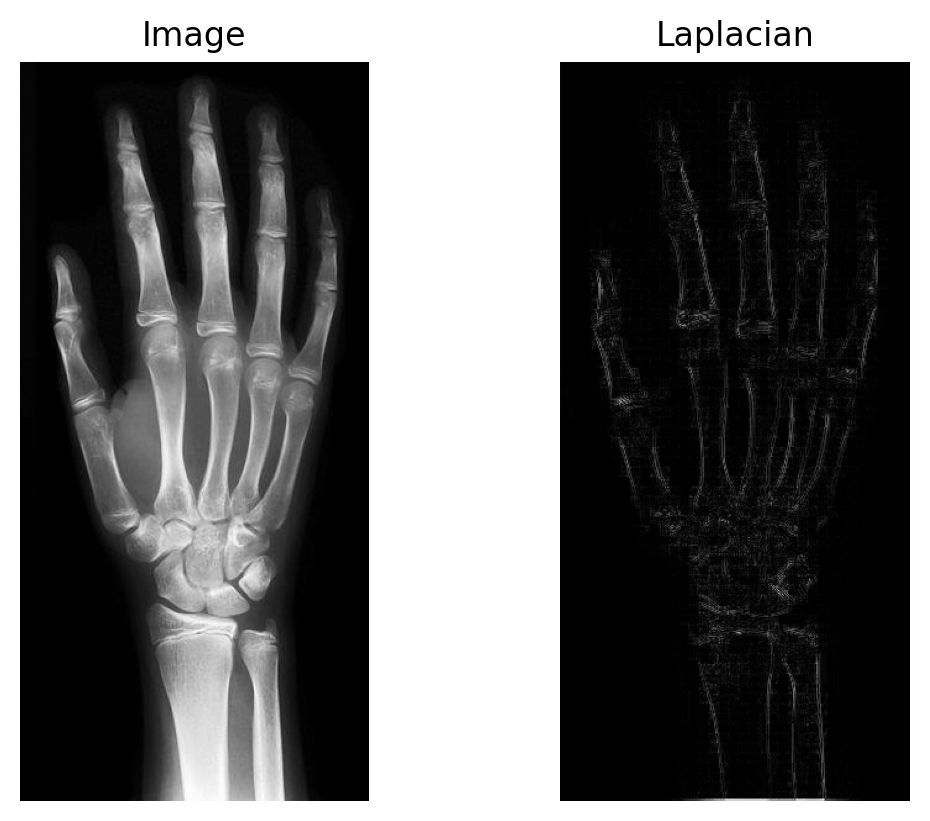

In [32]:
laplacian_image = laplacian(image)
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 2, 2)
plt.imshow(np.abs(laplacian_image), cmap='gray')
plt.axis('off')
plt.title("Laplacian")
plt.show()